# Classification Prediction

#### Given an anonymous data set, we will try to predict the class probabilities for belonging to the positive class (labeled '1').

In [31]:
import pandas as pd
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Imputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, RFE, RFECV
from sklearn.externals import joblib

import warnings
warnings.simplefilter('ignore')

from multiprocessing import cpu_count

# For plotting
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Set DataFrame display options
pd.options.display.max_columns = None
pd.set_option('display.max_row', 101)

In [32]:
# Show the number of CPU cores
print(cpu_count())

8


# Read the Data

In [3]:
df = pd.read_csv("data/exercise_03_train.csv")
test_df = pd.read_csv("data/exercise_03_test.csv")

# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, x0 to y
dtypes: float64(94), int64(1), object(6)
memory usage: 30.8+ MB


In [5]:
df.shape

(40000, 101)

In [6]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,83.812330,-0.122672,65.391785,6.323478,-18.511031,2.122648,0.319472,7.650422,7.713315,2.789856,3.161937,0.314606,-2.337769,0.346473,-0.034445,6.846460,-1.432359,-2.201084,-3.354706,-14.928499,-0.508166,18.000683,-7.417965,0.630054,-4.637193,-44.558764,11.845979,10.375184,-3.198000,-1.386096,9.219494,11.276351,-10.490478,-4.955304,Honda,wed,0.912923,1.447599,7.223553,6.345453,-12.853527,$229.47,-73.696118,-2.739030,23.206414,0.0%,-7.312450,4.036468,-1.269211,15.902179,25.264524,-19.944331,-8.155119,0.518441,-3.452840,3.477219,5.028244,-0.766853,0.970404,-6.553208,-1.694899,-37.704064,-8.675090,-16.294499,-1.664874,-2.099760,-0.223206,-2.428459,July,51.746057,34.344297,44.278620,-3.272041,-31.271870,-12.342707,-24.727017,-3.950582,-28.817173,-2.383631,54.853290,-21.780661,-2.542505,-5.802268,-56.498694,-9.580207,12.248465,7.674024,0.050937,5.913765,1.970939,-144.208496,5.482352,12.211997,asia,-3.201565,-9.837196,-21.092011,4.671140,0.588994,-11.417083,0
1,-0.445312,-0.436077,12.981759,30.716674,-34.981679,-16.712862,0.530105,8.740222,56.044533,0.075118,-37.992717,-0.165275,-3.566991,-0.509367,2.810061,-5.014334,-0.248782,3.993480,2.023831,-11.334563,-0.882649,-20.426731,-4.132525,-0.755783,-3.195466,27.074335,-0.122106,-19.731409,-0.587150,0.576996,5.362257,-18.287779,11.000913,-4.464928,Honda,wednesday,-1.909344,-22.820981,1.659441,1.335120,21.662360,$213.9,161.950929,14.230611,-170.533210,-0.0%,-1.900118,33.197063,0.669210,-17.165298,14.336000,-6.874649,-3.768920,-21.925943,2.834963,-6.932305,-11.479294,-4.539812,-1.717179,2.649737,0.940187,20.754071,-8.693321,-32.817709,-1.120819,8.802850,1.171086,3.023245,Jun,-220.595454,-2.385381,8.773979,-3.960816,-6.953864,-12.121296,13.857537,-23.018404,27.170559,-0.024138,-42.196071,8.335470,5.435904,-7.922957,77.412079,-5.405357,-4.513079,-2.398428,1.761859,-2.619810,-9.045592,148.348086,-6.083035,-5.098374,asia,5.433036,91.724841,4.305371,4.329130,0.371513,8.474528,0
2,82.927148,0.075277,-29.096012,-20.176841,10.109713,-45.994005,0.618132,7.757838,-69.749060,-1.561335,116.410969,0.192342,-7.645987,0.965640,1.074688,-3.301405,1.750239,7.658523,-3.546696,-18.506079,-0.614946,47.179031,5.215522,1.347929,0.744635,-31.950503,-4.809379,-27.861889,-0.054064,-1.557694,14.415605,3.122563,-0.635359,-10.421105,volkswagon,thurday,-3.131930,10.095960,-0.690880,2.504871,-4.413666,$2207.13,-105.242685,-7.087897,-81.760391,-0.02%,4.915974,-6.845058,-0.228783,-38.756694,11.879903,-71.294059,-2.889067,17.590918,2.893195,-10.295296,22.774447,-10.388426,-3.399829,-4.831446,17.547855,42.527355,-0.549690,24.086445,1.775456,10.185312,2.599926,-1.638474,Aug,123.476657,19.379312,-49.483866,26.352788,40.813441,19.715767,17.466146,-1.239946,-78.163037,-0.021548,-10.996892,40.412330,6.621187,-3.107994,23.844594,-7.680864,43.118893,7.351277,-0.375599,-8.408146,6.285944,-76.239072,0.200787,-7.174907,asia,2.595005,-14.630603,-3.743052,-14.820376,-2.366675,2.613091,0
3,370.736586,-0.263338,-75.273905,-21.765844,-72.478339,-8.701108,0.332586,2.769763,-35.815423,5.230400,126.279854,-0.120964,-4.147042,-0.560841,1.196674,0.094986,1.097013,-2.590958,5.693419,-41.960069,-0.161400,42.600594,-3.005460,1.021954,-2.027826,-12.732195,-8.854023,-30.366066,12.783482,1.943701,4.834265,-1.183167,0.671143,-5.032338,volkswagon,thurday,-4.322898,0.317175,-4.903652,4.701032,-45.327546,$82.09,-90.507566,-20.113745,-143.896780,-0.0%,-5.688367,32.806852,-1.695647,12.248845,-2.186258,32.133978,-7.229061,3.083700,0.477472,-1.552590,-0.791415,-23.025946,-3.282514,1.798865,2.303376,6.390344,-7.078124,-12.500280,0.489675,5.578700,1.687373,-5.466455,July,

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 100 columns):
x0     9997 non-null float64
x1     9998 non-null float64
x2     9997 non-null float64
x3     9997 non-null float64
x4     9999 non-null float64
x5     9998 non-null float64
x6     9996 non-null float64
x7     9996 non-null float64
x8     10000 non-null float64
x9     9999 non-null float64
x10    9998 non-null float64
x11    9999 non-null float64
x12    10000 non-null float64
x13    9997 non-null float64
x14    9999 non-null float64
x15    9998 non-null float64
x16    9999 non-null float64
x17    9999 non-null float64
x18    9999 non-null float64
x19    10000 non-null float64
x20    10000 non-null float64
x21    9996 non-null float64
x22    9998 non-null float64
x23    9998 non-null float64
x24    9995 non-null float64
x25    9997 non-null float64
x26    9997 non-null float64
x27    9999 non-null float64
x28    9998 non-null float64
x29    9998 non-null float64
x30    9999 non-n

In [8]:
test_df.shape

(10000, 100)

In [9]:
test_df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,120.252886,-0.170668,20.710224,-13.409410,-20.148997,18.649383,0.015563,0.799069,27.749853,0.457208,1.303670,0.518309,-3.541998,0.827510,-2.439269,17.130073,2.095122,-8.416516,2.426525,-2.357795,-0.196103,4.094550,1.966755,-1.227354,7.520205,77.158063,-15.200760,32.978344,5.960004,-0.140251,-0.044797,-0.554050,23.477165,-13.019712,Toyota,wed,0.994586,7.756120,-2.780489,0.611505,47.477817,$1251.44,-102.352794,31.569745,-338.300463,0.01%,-0.371676,7.982137,-3.636586,-0.878726,-20.160883,-22.596082,-7.610951,-26.755070,-0.378326,1.745079,-11.236853,-9.522726,-4.212189,5.406876,2.173530,60.742109,-5.046570,5.830773,-0.365000,-13.498735,2.506932,-0.655364,May,-347.082415,12.491419,-8.183898,-31.298288,-26.155737,-0.820886,1.769382,-3.200942,38.958304,-2.197368,6.987835,-7.195617,0.727288,14.073406,75.674698,8.840502,-11.232970,0.860149,5.333224,9.231668,-2.525725,-42.154991,-5.020444,0.142960,asia,12.202997,17.206558,-6.698424,10.669022,0.535953,0.794408
1,151.496163,-0.065142,-1.423250,9.250107,-58.582435,-3.730727,0.469421,2.994060,-74.308495,6.637583,33.384399,0.154858,-1.336561,0.152448,0.917624,-30.862604,-0.357345,-0.960836,0.589780,1.060362,-0.021947,9.149423,-25.104044,-0.204477,-0.900078,1.844679,-10.761931,33.479469,-3.898519,-1.620004,-3.583649,5.406482,-9.531959,3.163882,volkswagon,thurday,-4.233680,-24.632191,-11.369496,4.370336,3.742759,$37.89,-106.072606,-7.747847,-53.138956,0.0%,4.612344,5.747541,0.763917,18.246483,-2.458167,-36.239048,-1.485077,-8.802835,3.158079,-1.483103,2.496544,3.326367,-1.308534,3.381756,18.967836,2.045895,-7.405607,-17.635735,-2.126548,6.617978,0.230388,5.931537,July,-10.206057,5.693664,29.954987,15.221384,-34.303125,18.674866,6.026287,-8.592568,-33.309231,-2.782034,32.219470,-10.752222,-2.287523,-0.060643,18.101172,3.091556,-36.276825,4.863419,-0.932377,14.551690,1.392922,-98.797446,-2.605834,4.222651,asia,0.865352,-31.330463,9.030439,1.769777,-0.265219,-2.511831
2,-46.054317,-0.174997,9.167775,7.611975,-33.043372,-2.258558,-0.308114,-8.216299,-10.016635,-2.693126,32.869789,0.091869,-4.735019,-0.796092,-0.191319,-8.444534,-0.660962,-6.515557,-1.428438,-13.655225,-0.020870,21.904143,15.239767,0.177921,0.740297,-61.699705,-0.189140,3.346040,-8.362527,-1.801399,-10.917602,-11.839965,-7.694302,1.211869,volkswagon,wed,-0.127550,-2.334179,-0.888963,-4.032057,-10.202934,$-966.23,11.395019,-22.114796,-91.069706,0.0%,-1.832264,-16.881272,3.443549,13.292843,-2.666099,-81.329624,-2.289228,-2.518859,-4.856447,-2.914084,-12.349916,6.444469,-3.129148,2.181371,1.087896,-41.427027,-2.604316,-23.519823,-2.684299,17.887187,-1.285647,-0.150313,Aug,-18.788523,-12.252145,28.176259,-23.487423,-26.376173,-21.610168,-28.688488,2.056937,-56.338307,-1.441083,-23.317242,-10.947029,-7.084773,-4.108970,-7.320086,2.782341,18.717636,-3.613232,-0.521420,2.504835,-0.205401,-246.457481,-3.404679,-4.384774,asia,-7.693588,-12.767262,-8.578260,0.202378,-0.901658,0.340148
3,-7.784201,-0.201334,24.985110,21.561477,5.953458,9.298979,0.061949,-1.028978,-46.827620,3.482482,-4.801427,0.204767,-0.856432,-1.044174,0.283989,3.950462,-0.488190,-6.120801,2.764099,44.132370,-0.462994,-10.145124,7.130275,-2.118193,-5.970714,-16.426354,-11.345381,61.937759,-4.775653,0.645556,-3.683926,-26.445823,-17.187901,0.295868,Honda,thurday,4.846349,11.651534,-2.148938,4.264462,-49.873480,$35.49,154.459933,25.477243,-65.819788,0.02%,-7.869362,13.570006,0.713669,-2.260414,25.490311,17.838431,2.602972,19.727887,-0.143148,0.256942,-32.919141,-6.967590,0.210810,2.028853,-9.765286,51.193774,-12.381608,-8.498973,0.269599,-6.955194,0.297250,5.016182,Mar,-90.116472,30.211704,

* #### There are categorical features that need to be on-hot encoded.

* #### We will have to transform features x41 (currency) and x45 (percentage) to numerical values.

In [10]:
# Check categorical features for data consistency
print(df['x34'].unique())
print("---" * 20)
print(df['x35'].unique())
print("---" * 20)
print(df['x68'].unique())
print("---" * 20)
print(df['x93'].unique())

['Honda' 'volkswagon' 'ford' 'Toyota' 'bmw' 'chrystler' 'tesla' 'nissan'
 nan 'mercades' 'chevrolet']
------------------------------------------------------------
['wed' 'wednesday' 'thurday' 'thur' 'friday' 'tuesday' 'monday' 'fri' nan]
------------------------------------------------------------
['July' 'Jun' 'Aug' 'sept.' 'May' 'Apr' 'Oct' 'Mar' 'Dev' 'Nov' nan 'Feb'
 'January']
------------------------------------------------------------
['asia' 'america' 'euorpe' nan]


* #### Data in feature x35 is inconsistent and we will need to fix (e.g. "thur" and "thurday" represent "thursday").

In [11]:
# Examine central tendencies for non-normal distributions
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x42,x43,x44,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99,y
count,39989.000000,39990.000000,39994.000000,39990.000000,39993.000000,39991.000000,39993.000000,39991.000000,39993.000000,39992.000000,39991.000000,39992.000000,39988.000000,39986.000000,39996.000000,39993.000000,39992.000000,39988.000000,39986.000000,39991.000000,39993.000000,39989.000000,39995.000000,39993.000000,39989.000000,39992.000000,39992.000000,39992.000000,39990.000000,39996.000000,39996.000000,39992.000000,39995.000000,39991.000000,39994.000000,39996.000000,39994.000000,39993.000000,39995.000000,39990.000000,39998.000000,39996.000000,39990.000000,39995.000000,39991.000000,39994.000000,39996.000000,39987.000000,39989.000000,39995.000000,39997.000000,39987.000000,39992.000000,39991.000000,39992.000000,39991.000000,39989.000000,39992.000000,39989.000000,39988.000000,39994.000000,39986.000000,39989.000000,39992.000000,39988.000000,39995.000000,39996.000000,39991.000000,39992.000000,39992.000000,39993.000000,39993.000000,39990.000000,39992.000000,39992.000000,39995.000000,39994.000000,39994.000000,39998.000000,39997.000000,39985.000000,39990.000000,39993.000000,39997.000000,39988.000000,39993.000000,39998.000000,39993.000000,39991.000000,39994.000000,39987.000000,39988.000000,39993.000000,39989.000000,40000.000000
mean,23.170164,-0.058983,1.639221,-0.815620,0.330524,-0.849090,-0.001158,-0.035723,-7.858543,-0.057514,7.725413,0.001757,-1.292777,0.001083,-0.005280,0.029036,-0.009168,-0.002246,0.820214,-0.000545,0.113387,4.021114,-1.021379,-0.006175,0.018025,0.271022,0.017768,9.801955,-0.013635,0.000164,-0.086003,0.043602,0.010439,-1.997013,0.012242,3.561921,0.003799,0.016293,1.711370,-1.960871,0.027996,-34.888080,0.022563,0.027504,0.012854,0.021384,4.346635,-6.917868,-0.013081,0.108675,-0.026513,0.102254,-0.566671,-0.054278,-0.446970,0.004736,0.026271,0.093144,-0.047512,-3.389009,0.002640,-0.018587,-0.107805,-0.012602,-16.324910,6.691733,0.308271,-3.068872,-4.773991,0.067168,5.290885,0.022417,-0.218028,-0.712122,1.672661,-0.045729,-0.015032,-0.026933,1.880606,-0.020209,-6.127721,0.040984,0.017975,-0.006529,0.015639,-14.261568,0.004626,-0.014280,-0.055800,-0.016031,-0.505100,-1.065555,0.004239,0.301483,0.202200
std,108.214096,0.276964,36.483433,16.661057,41.008110,21.212786,0.740514,6.636854,35.469358,6.267267,41.798849,0.286912,5.200432,0.818178,1.736482,9.751890,1.288348,9.828563,3.314209,32.567462,0.593460,21.821443,20.492710,1.248677,3.841835,37.451129,7.907253,42.155732,3.944324,1.009055,8.210576,9.417997,8.859309,10.374541,3.439748,23.986813,3.653339,3.299736,30.494213,95.202211,14.708152,142.207402,4.495728,27.234624,2.831783,17.618706,22.356165,39.561445,7.022531,13.944843,2.643278,9.427887,10.353895,9.372627,3.156968,4.580913,6.857471,36.123519,7.890975,18.100807,1.688334,9.760572,1.801569,3.482247,148.202720,36.368679,37.314904,15.520682,25.442676,15.164145,34.311856,9.733415,38.994669,4.041249,30.974604,14.371100,5.327762,9.132240,41.690927,4.621173,31.230701,6.411744,3.067793,9.831749,9.871077,152.968028,4.998175,6.462462,5.631501,32.430072,13.254744,7.673260,1.020904,8.557658,0.401646
min,-413.886484,-1.170678,-155.506382,-72.148195,-154.979397,-85.536249,-2.882761,-25.258523,-143.381931,-24.544850,-176.261585,-1.149737,-22.582317,-3.239807,-6.853808,-39.896843,-4.887040,-38.599291,-12.517094,-131.634909,-2.627729,-89.274548,-88.267737,-6.219531,-15.108879,-145.365612,-36.185375,-152.152668,-16.004989,-4.247852,-36.166630,-38.970806,-37.058259,-47.939957,-13.977415,-96.820049,-14.257539,-12.811452,-124.764576,-477.626935,-63.733319,-689.090115,-18.535893,-113.327074,-11.247855,-74.834761,-87.376737,-177.338012,-27.706073,-53.040172,-10.120854,-42.35

* #### The features have widely different ranges. We will need to standardize them.

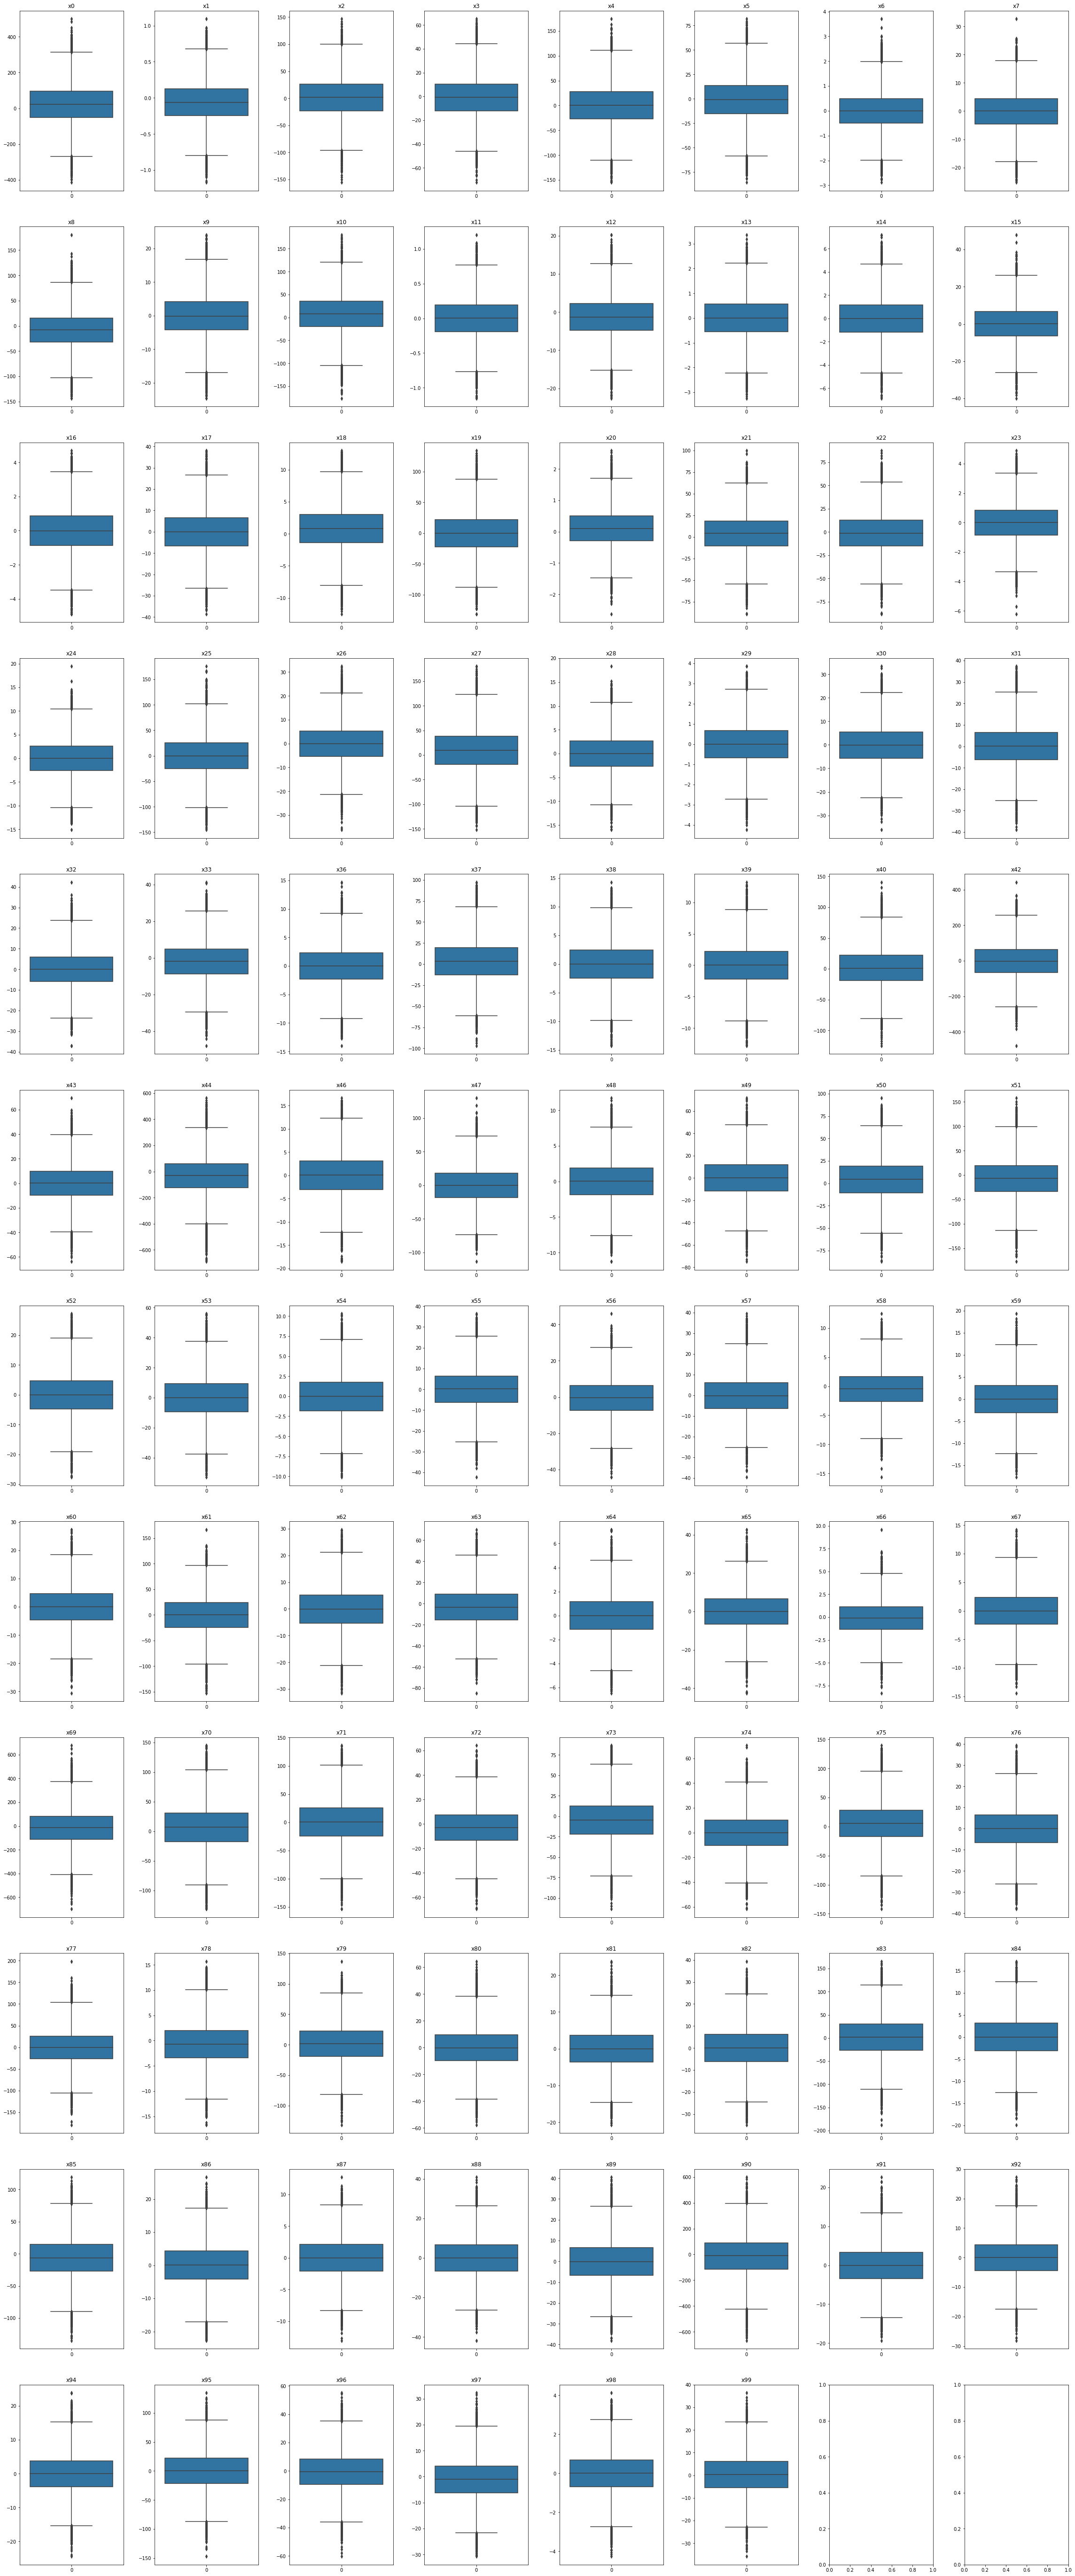

In [12]:
# Examine boxplots to confirm symmetric distribution. Can assume normal distribution.
exclude_cols = ['x34','x35', 'x41', 'x45', 'x68','x93','y']
numeric_features = [x for x in df.columns.tolist() if x not in exclude_cols]
n_features =len(numeric_features)
ncols = 8
nrows = math.ceil(n_features/ncols)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, gridspec_kw={'wspace':.3}, figsize=(40,100))

n=0

for i in range(nrows):
    for j in range(ncols):
        try:
            sns.boxplot(data=df[numeric_features[n]], ax=axs[i][j]).set_title(numeric_features[n])
            n += 1
        except IndexError:
            pass

plt.savefig('boxplots.png')    
plt.show()

* #### The data is symetric and is assumed to be normally distributed.

In [13]:
# Count how many missing values are in the data set
df.isnull().sum()

x0     11
x1     10
x2      6
x3     10
x4      7
x5      9
x6      7
x7      9
x8      7
x9      8
x10     9
x11     8
x12    12
x13    14
x14     4
x15     7
x16     8
x17    12
x18    14
x19     9
x20     7
x21    11
x22     5
x23     7
x24    11
x25     8
x26     8
x27     8
x28    10
x29     4
x30     4
x31     8
x32     5
x33     9
x34     7
x35     9
x36     6
x37     4
x38     6
x39     7
x40     5
x41     6
x42    10
x43     2
x44     4
x45     5
x46    10
x47     5
x48     9
x49     6
x50     4
x51    13
x52    11
x53     5
x54     3
x55    13
x56     8
x57     9
x58     8
x59     9
x60    11
x61     8
x62    11
x63    12
x64     6
x65    14
x66    11
x67     8
x68    10
x69    12
x70     5
x71     4
x72     9
x73     8
x74     8
x75     7
x76     7
x77    10
x78     8
x79     8
x80     5
x81     6
x82     6
x83     2
x84     3
x85    15
x86    10
x87     7
x88     3
x89    12
x90     7
x91     2
x92     7
x93     6
x94     9
x95     6
x96    13
x97    12
x98     7
x99    11


In [14]:
df.isnull().sum().sum()

796

In [15]:
test_df.isnull().sum()

x0     3
x1     2
x2     3
x3     3
x4     1
x5     2
x6     4
x7     4
x8     0
x9     1
x10    2
x11    1
x12    0
x13    3
x14    1
x15    2
x16    1
x17    1
x18    1
x19    0
x20    0
x21    4
x22    2
x23    2
x24    5
x25    3
x26    3
x27    1
x28    2
x29    2
x30    1
x31    2
x32    2
x33    3
x34    2
x35    4
x36    3
x37    2
x38    0
x39    3
x40    3
x41    0
x42    5
x43    0
x44    1
x45    2
x46    1
x47    1
x48    5
x49    0
x50    3
x51    0
x52    0
x53    1
x54    3
x55    4
x56    4
x57    1
x58    2
x59    2
x60    3
x61    1
x62    5
x63    3
x64    0
x65    0
x66    0
x67    2
x68    1
x69    2
x70    1
x71    2
x72    1
x73    5
x74    2
x75    5
x76    4
x77    2
x78    2
x79    2
x80    4
x81    0
x82    4
x83    4
x84    0
x85    0
x86    2
x87    2
x88    3
x89    1
x90    1
x91    3
x92    1
x93    2
x94    3
x95    3
x96    4
x97    1
x98    0
x99    4
dtype: int64

In [16]:
test_df.isnull().sum().sum()

204

* #### There are missing numerical and categorical values that we will have to address.

In [17]:
# Check for output label imbalance.
df['y'].value_counts()

0    31912
1     8088
Name: y, dtype: int64

* #### The output label (y) is imbalanced. We will need to stratify the data during test train split.

### Summary of train data set

    * 40,000 observations
    * Class labels consist of 31,912 0's and 8088 1's
    * 96 numeric features
    * 4 categorical features
    * 796 missing values

### Correlated features

In [18]:
# Examine the correlation of features to y.
corr_matrix = df.corr().abs()
print(corr_matrix['y'].sort_values(ascending=False).head(10))

y      1.000000
x75    0.209492
x37    0.194480
x58    0.184603
x97    0.183035
x70    0.104092
x3     0.102359
x1     0.102117
x69    0.095984
x99    0.095187
Name: y, dtype: float64


* #### None of the features are correlated with y strongly enough (>0.3) to be removed.

# Data Cleaning

### Converting features to floats

In [19]:
# Fix data consistency for days of the week
df['x35'].replace(['wed', 'thurday', 'thur', 'fri'],['wednesday', 'thursday', 'thursday', 'friday'], inplace=True)
test_df['x35'].replace(['wed', 'thurday', 'thur', 'fri'],['wednesday', 'thursday', 'thursday', 'friday'], inplace=True)

# Columns x41 (currency) and x45 (percentage) should be treated as numerical values
df['x41'] = df['x41'].replace('[\$,]', '', regex=True).astype(float)
test_df['x41'] = df['x41'].replace('[\$,]', '', regex=True).astype(float)

df['x45'] = df['x45'].replace('[\%,]', '', regex=True).astype(float)
df.loc[:,'x45'] *= 0.01
test_df['x45'] = df['x45'].replace('[\%,]', '', regex=True).astype(float)
test_df.loc[:,'x45'] *= 0.01

### Converting feature data types

In [20]:
# List of feature names
X_cols = [c for c in df if c not in ["y"]]

# Lists of numeric and categorical features
numeric_features = df.select_dtypes(include=['float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Convert 'object' dtypes to 'category'
for f in categorical_features:
    df[f] = df[f].astype("category")

for f in categorical_features:
    test_df[f] = test_df[f].astype("category")

# Create a Train Test Split

In [21]:
Y = df["y"]
X = df.drop('y', axis=1)

In [22]:
# Stratified sampling used to ensure a proportional target class distribution in the train and test sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=7, stratify=Y)

In [23]:
print(X_train.shape)
print(X_test.shape)

(30000, 100)
(10000, 100)


# Preprocessing Pipeline

### This transformer does the following:
* #### Selects relevant feature columns
* #### Imputes and scales the numeric features
* #### Imputes and on-hot encodes the categorical features
* #### Performs numeric and category transformations in parallel using FeatureUnion

In [24]:
# Selects columns from a dataframe
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("The DataFrame does not include the columns: %s" % cols_error)

In [25]:
# Selects columns from a dataframe by dtype
# Useful for seperating categorical and numeric features to facilitate FeatureUnion in pipelines
class TypeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, dtype):
        self.dtype = dtype

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X.select_dtypes(include=[self.dtype])

In [26]:
# Preprocessing pipeline
preprocess_pipeline = make_pipeline(
    ColumnSelector(columns=X_cols),
    FeatureUnion(transformer_list=[
        ("numeric_features", make_pipeline(
            TypeSelector(np.number),
            SimpleImputer(strategy="median"),
            StandardScaler()
        )),
        ("categorical_features", make_pipeline(
            TypeSelector("category"),
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(drop='first', handle_unknown='error')
        ))
    ])
)

# Baseline Models

### Logistic Regression

In [27]:
"""
Logistic Regression (using all features)
"""
lr_pl = make_pipeline(
    preprocess_pipeline,
    LogisticRegression()
)

param_grid = {
    "logisticregression__penalty": ["l1", "l2"],
    "logisticregression__C": [0.01, 0.05, 0.25, 0.5, 1]
}

lr_grid = GridSearchCV(lr_pl, param_grid, scoring="roc_auc", cv=3, n_jobs=8)
lr_grid.fit(X_train, Y_train)

print(f"Best: {lr_grid.best_score_} with {lr_grid.best_params_}")

# Best model
lr_model = lr_grid.best_estimator_

print(f"Test set AUC: {roc_auc_score(Y_test, lr_model.predict(X_test))}\n")

means = lr_grid.cv_results_['mean_test_score'] 
stds = lr_grid.cv_results_['std_test_score'] 
params = lr_grid.cv_results_['params']
results_list = []
for mean, stdev, param in zip(means, stds, params):
    results_list.append([mean, stdev, param])
results_list_sorted = sorted(results_list, key=lambda x: x[0], reverse=True)

# Show the top 3 best performances
print("Top 3 performances are: \n")
for i in range(3):
    print(f"{results_list_sorted[i][0]} ({results_list_sorted[i][1]}) with: {results_list_sorted[i][2]}")
    print("---" * 20)

Best: 0.9052706722253094 with {'logisticregression__C': 0.25, 'logisticregression__penalty': 'l1'}
Test set AUC: 0.7793586170078497

Top 3 performances are: 

0.9052706722253094 (0.0018820374652060985) with: {'logisticregression__C': 0.25, 'logisticregression__penalty': 'l1'}
------------------------------------------------------------
0.9051795875849488 (0.0017141300194900588) with: {'logisticregression__C': 0.05, 'logisticregression__penalty': 'l1'}
------------------------------------------------------------
0.9051540681813994 (0.0018828020478057926) with: {'logisticregression__C': 0.5, 'logisticregression__penalty': 'l1'}
------------------------------------------------------------


### k-Nearest Neighbors

In [ ]:
"""
k-Nearest Neighbors
"""
kn_pl = make_pipeline(
    preprocess_pipeline,
    KNeighborsClassifier()
)

param_grid = {
    'kneighborsclassifier__n_neighbors': [3,7,11,15,19,23]
}

kn_grid = GridSearchCV(kn_pl, param_grid, scoring="roc_auc", cv=3, n_jobs=8)
kn_grid.fit(X_train, Y_train)

print(f"Best: {kn_grid.best_score_} with {kn_grid.best_params_}")

# Best model
kn_model = kn_grid.best_estimator_

print(f"Test set AUC: {roc_auc_score(Y_test, kn_model.predict(X_test))}\n")

means = kn_grid.cv_results_['mean_test_score'] 
stds = kn_grid.cv_results_['std_test_score'] 
params = kn_grid.cv_results_['params']
results_list = []
for mean, stdev, param in zip(means, stds, params):
    results_list.append([mean, stdev, param])
results_list_sorted = sorted(results_list, key=lambda x: x[0], reverse=True)

# Show the top 3 best performances
print("Top 3 performances are: \n")
for i in range(3):
    print(f"{results_list_sorted[i][0]} ({results_list_sorted[i][1]}) with: {results_list_sorted[i][2]}")
    print("---" * 20)

### SVM

In [ ]:
"""
SVC (using all features)
"""
sv_pl = make_pipeline(
    preprocess_pipeline,
    SVC()
)

param_grid = {
    'svc__C': [0.1, 1, 10, 100], 
    'svc__kernel': ['linear','rbf']
}

sv_grid = GridSearchCV(sv_pl, param_grid, scoring="roc_auc", cv=3, n_jobs=8)
sv_grid.fit(X_train, Y_train)

print(f"Best: {sv_grid.best_score_} with {sv_grid.best_params_}")

# Best model
sv_model = sv_grid.best_estimator_

print(f"Test set AUC: {roc_auc_score(Y_test, sv_model.predict(X_test))}\n")

means = sv_grid.cv_results_['mean_test_score'] 
stds = sv_grid.cv_results_['std_test_score'] 
params = sv_grid.cv_results_['params']
results_list = []
for mean, stdev, param in zip(means, stds, params):
    results_list.append([mean, stdev, param])
results_list_sorted = sorted(results_list, key=lambda x: x[0], reverse=True)

# Show the top 3 best performances
print("Top 3 performances are: \n")
for i in range(3):
    print(f"{results_list_sorted[i][0]} ({results_list_sorted[i][1]}) with: {results_list_sorted[i][2]}")
    print("---" * 20)

### Decision Tree

In [ ]:
"""
Decision Tree
"""
dt_pl = make_pipeline(
    preprocess_pipeline,
    DecisionTreeClassifier()
)

param_grid = {
    'decisiontreeclassifier__max_depths' = [6,15,20,25]
    'decisiontreeclassifier__max_features' = [10,25,50,70,100],
    'decisiontreeclassifier__n_estimators':[10,15,20,25,30],
    'decisiontreeclassifier__min_samples_leaf':[0.1,0.5,1,3],
    'decisiontreeclassifier__min_samples_split':[0.1,0.5,1,5,10]
}

dt_grid = GridSearchCV(dt_pl, param_grid, scoring="roc_auc", cv=3, n_jobs=8)
dt_grid.fit(X_train, Y_train)

print(f"Best: {dt_grid.best_score_} with {dt_grid.best_params_}")

# Best model
dt_model = dt_grid.best_estimator_

print(f"Test set AUC: {roc_auc_score(Y_test, dt_model.predict(X_test))}\n")

means = dt_grid.cv_results_['mean_test_score'] 
stds = dt_grid.cv_results_['std_test_score'] 
params = dt_grid.cv_results_['params']
results_list = []
for mean, stdev, param in zip(means, stds, params):
    results_list.append([mean, stdev, param])
results_list_sorted = sorted(results_list, key=lambda x: x[0], reverse=True)

# Show the top 3 best performances
print("Top 3 performances are: \n")
for i in range(3):
    print(f"{results_list_sorted[i][0]} ({results_list_sorted[i][1]}) with: {results_list_sorted[i][2]}")
    print("---" * 20)

### Random Forest

In [ ]:
"""
Random Forest
"""
rf_pl = make_pipeline(
    preprocess_pipeline,
    RandomForestClassifier()
)

param_grid = {
    'randomforestclassifier__max_depths' = [6,15,20,25]
    'randomforestclassifier__max_features' = [10,25,50,70,100],
    'randomforestclassifier__n_estimators':[10,15,20,25,30],
    'randomforestclassifier__min_samples_leaf':[1,2,3],
    'randomforestclassifier__min_samples_split':[3,4,5,6,7]
}

rf_grid = GridSearchCV(rf_pl, param_grid, scoring="roc_auc", cv=3, n_jobs=8)
rf_grid.fit(X_train, Y_train)

print(f"Best: {rf_grid.best_score_} with {rf_grid.best_params_}")

# Best model
rf_model = rf_grid.best_estimator_

print(f"Test set AUC: {roc_auc_score(Y_test, rf_model.predict(X_test))}\n")

means = rf_grid.cv_results_['mean_test_score'] 
stds = rf_grid.cv_results_['std_test_score'] 
params = rf_grid.cv_results_['params']
results_list = []
for mean, stdev, param in zip(means, stds, params):
    results_list.append([mean, stdev, param])
results_list_sorted = sorted(results_list, key=lambda x: x[0], reverse=True)

# Show the top 3 best performances
print("Top 3 performances are: \n")
for i in range(3):
    print(f"{results_list_sorted[i][0]} ({results_list_sorted[i][1]}) with: {results_list_sorted[i][2]}")
    print("---" * 20)

### Logistic Regression using Univariate Feature Selection and PCA

In [29]:
"""
Logistic Regression (using SelectKBest and PCA)
"""

selection = SelectKBest()
pca = PCA()

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

lr_kbest_pca_pl = Pipeline([
    ("preprocess_pipeline", preprocess_pipeline),
    ("features", combined_features),
    ("logisticregression", LogisticRegression())
])

param_grid = {
    "features__univ_select__k": [20, 40, 60, 80, 100],
    "features__pca__n_components": [20, 40, 60, 80, 100],
    "logisticregression__penalty": ["l1", "l2"],
    "logisticregression__C": [0.01, 0.05, 0.25, 0.5, 1]
}

lr_kbest_pca_grid = GridSearchCV(lr_kbest_pca_pl, param_grid, scoring="roc_auc", cv=3, n_jobs=8)
lr_kbest_pca_grid.fit(X_train, Y_train)

print(f"Best: {lr_kbest_pca_grid.best_score_} with {lr_kbest_pca_grid.best_params_}")

# Best model
lr_kbest_pca_model = lr_kbest_pca_grid.best_estimator_

print(f"Test set AUC: {roc_auc_score(Y_test, lr_model.predict(X_test))}\n")

means = lr_kbest_pca_grid.cv_results_['mean_test_score'] 
stds = lr_kbest_pca_grid.cv_results_['std_test_score'] 
params = lr_kbest_pca_grid.cv_results_['params']
results_list = []
for mean, stdev, param in zip(means, stds, params):
    results_list.append([mean, stdev, param])
results_list_sorted = sorted(results_list, key=lambda x: x[0], reverse=True)

# Show the top 3 best performances
print("Top 3 performances are: \n")
for i in range(3):
    print(f"{results_list_sorted[i][0]} ({results_list_sorted[i][1]}) with: {results_list_sorted[i][2]}")
    print("---" * 20)

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [33]:
"""
Logistic Regression (using SelectKBest and TruncatedSVD)
"""

# Use TruncatedSVD instead of PCA because it supports sparse matrices input
selection = SelectKBest()
svd = TruncatedSVD()

combined_features = FeatureUnion([("svd", svd), ("univ_select", selection)])

lr_kbest_svd_pl = Pipeline([
    ("preprocess_pipeline", preprocess_pipeline),
    ("features", combined_features),
    ("logisticregression", LogisticRegression())
])

param_grid = {
    "features__univ_select__k": [20, 40, 60, 80, 100],
    "features__svd__n_components": [20, 40, 60, 80, 100],
    "logisticregression__penalty": ["l1", "l2"],
    "logisticregression__C": [0.01, 0.05, 0.25, 0.5, 1]
}

lr_kbest_svd_grid = GridSearchCV(lr_kbest_svd_pl, param_grid, scoring="roc_auc", cv=3, n_jobs=8)
lr_kbest_svd_grid.fit(X_train, Y_train)

print(f"Best: {lr_kbest_svd_grid.best_score_} with {lr_kbest_svd_grid.best_params_}")

# Best model
lr_kbest_pca_model = lr_kbest_svd_grid.best_estimator_

print(f"Test set AUC: {roc_auc_score(Y_test, lr_model.predict(X_test))}\n")

means = lr_kbest_svd_grid.cv_results_['mean_test_score'] 
stds = lr_kbest_svd_grid.cv_results_['std_test_score'] 
params = lr_kbest_svd_grid.cv_results_['params']
results_list = []
for mean, stdev, param in zip(means, stds, params):
    results_list.append([mean, stdev, param])
results_list_sorted = sorted(results_list, key=lambda x: x[0], reverse=True)

# Show the top 3 best performances
print("Top 3 performances are: \n")
for i in range(3):
    print(f"{results_list_sorted[i][0]} ({results_list_sorted[i][1]}) with: {results_list_sorted[i][2]}")
    print("---" * 20)

KeyboardInterrupt: 

# Finalize Model

In [ ]:
Y_score = lr_model.decision_function(X_test)
Y_score

fpr, tpr, thresholds = roc_curve(Y_test, Y_score)
roc_auc = roc_auc_score(Y_test, Y_score)

# Plot ROC curve
plt.figure(figsize=(16, 12))
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)', size=16)
plt.ylabel('True Positive Rate (Sensitivity)', size=16)
plt.title('ROC Curve', size=20)
plt.legend(fontsize=14);

In [ ]:
"""
Save the best model
"""
# Create a pipeline
scaler = StandardScaler()
rf = RandomForestClassifier(max_features=10, n_estimators=80, random_state=seed)
pipe = Pipeline(steps=[('scaler', scaler), ('rf', rf)])
pipe.fit(X_train, Y_train)
print(f"Final average accuracy: {(roc_auc_score(Y_dev, pipe.predict(X_dev_scaled)) + roc_auc_score(Y_test, pipe.predict(X_test_scaled))) / 2}")

In [ ]:
# Save the final model
joblib.dump(pipe, "model/clf.pkl")

In [ ]:
# Load model and test again
model = joblib.load("model/clf.pkl")
print(f"Final average accuracy: {(roc_auc_score(Y_dev, model.predict(X_dev_scaled)) + roc_auc_score(Y_test, model.predict(X_test_scaled))) / 2}")

# Make Predictions

In [ ]:
lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])
lr.fit(X_train, Y_train)
print(roc_auc_score(Y_test, lr.predict(X_test)))
lr.predict_proba(X_test)[:,1]

In [ ]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
rf.fit(X_train, Y_train)
print(roc_auc_score(Y_test, rf.predict(X_test)))
rf.predict_proba(X_test)[:,1]